# **Telecom Churn Prediction – Identifying At-Risk Customers for Orange Telecom**

# Introduction

**Problem Statement**

Customer churn is one of the biggest challenges for telecom providers. Losing customers not only impacts revenue but also indicates dissatisfaction with services, support, or plan features. Retaining existing customers is often more cost-effective than acquiring new ones, making churn prediction a top priority for telecom companies.

The challenges include:

* Class Imbalance: A relatively small number of customers actually churn, making it harder to detect and model accurately.
* Complex Customer Behavior: Usage patterns, service plans, and support interactions all contribute to churn, requiring a combination of numerical and categorical data handling.
* No Geographic Benchmarking: Understanding churn trends across different regions (e.g., US states) can help identify where retention strategies need to be improved.






  
**Study Aim**

The goal of this project is to build a predictive model using Orange Telecom’s customer activity data to identify customers most likely to churn. By analyzing service usage, customer service interactions, and plan types, the project aims to:

* Predict which customers are at risk of leaving the company
* Uncover which features most strongly influence churn behavior
* Support retention strategies by targeting the right customers at the right time
* Visualize churn patterns through an interactive Tableau dashboard, including regional churn breakdowns


**Notebook Covers**

* Data Cleaning & Preprocessing: Handling class imbalance, encoding categorical variables, identifying correlations, and preparing data for modeling
* Exploratory Data Analysis (EDA): Analyzing customer demographics, call behavior, service plans, and churn trends
* Model Building & Evaluation: Applying Logistic Regression and Random Forest models, and evaluating performance using confusion matrices, ROC-AUC, precision, and recall
* Feature Importance & Business Insights: Highlighting key drivers of churn to inform business decisions
* Data Visualization: Creating a Tableau dashboard to display churn by state, customer segments, and plan usage




# Data Preperation

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Loading dataset
churn_dataset = pd.read_excel("/kaggle/input/dataset-hs/churn_dataset.xlsx")

In [2]:
# Convert all column names to lowercase and replacing spaces with underscore

churn_dataset.columns = churn_dataset.columns.str.strip().str.lower().str.replace(' ', '_')
df = churn_dataset

# Summary information about the dataset
df.info()

# There is no any missing value. No need for amputating missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [3]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3329,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3330,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3331,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [4]:
# Binary encoding for yes/no columns
binary_map = {'Yes': 1, 'No': 0}

df['international_plan'] = df['international_plan'].map(binary_map)
df['voice_mail_plan'] = df['voice_mail_plan'].map(binary_map)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

# Explanatory Data Analysis 

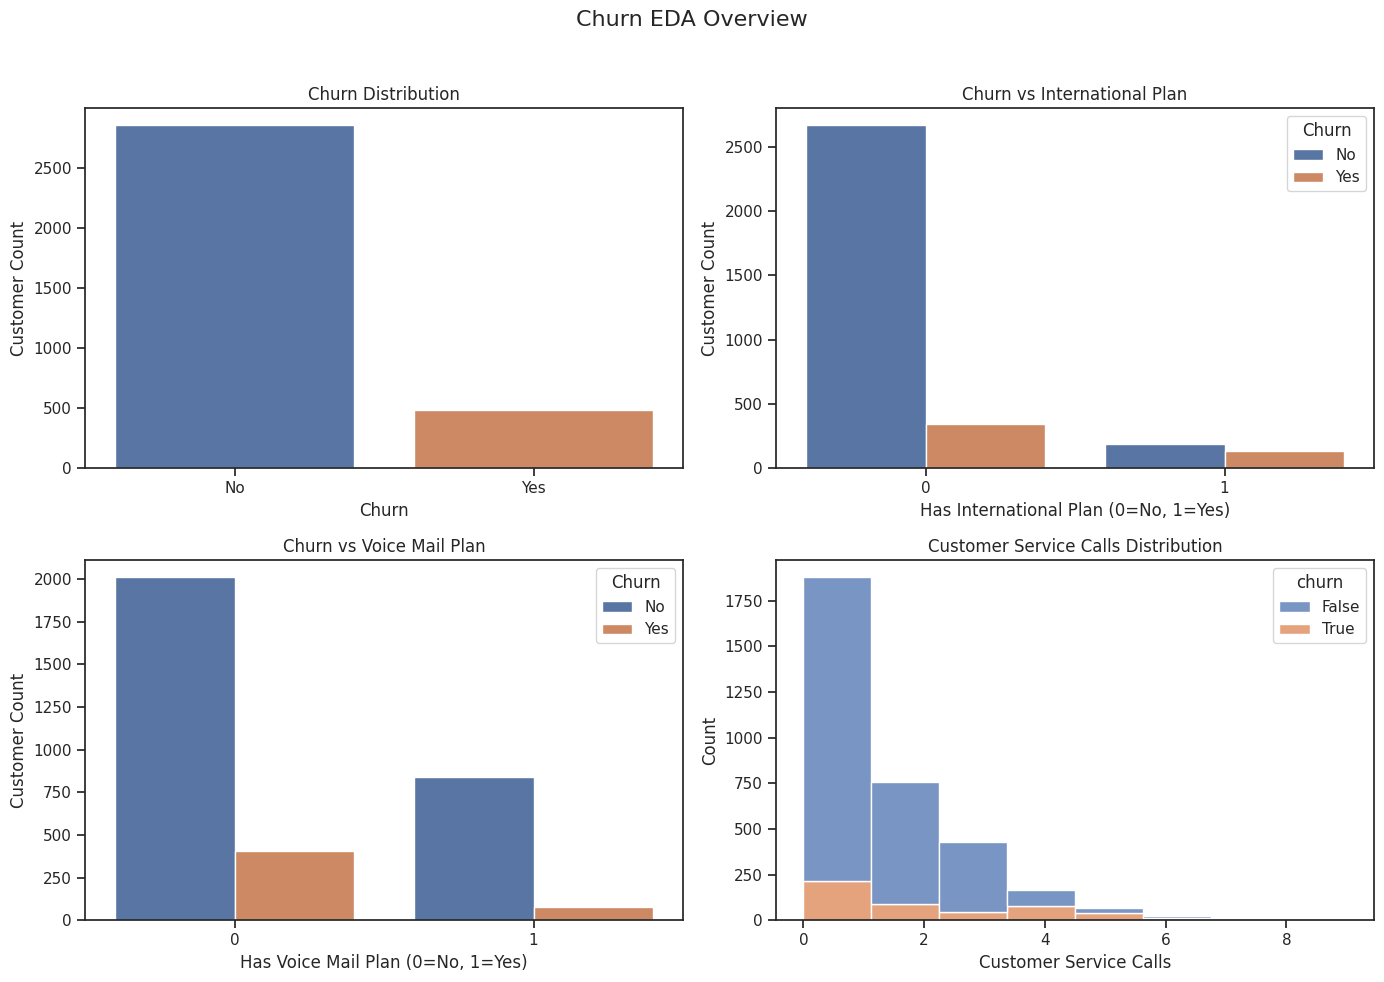

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up plot style
sns.set(style="ticks")

# Basic EDA
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.suptitle("Churn EDA Overview", fontsize=16)

# Churn Distribution
sns.countplot(x='churn', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Churn Distribution")
axes[0, 0].set_xlabel("Churn")
axes[0, 0].set_ylabel("Customer Count")
axes[0, 0].set_xticklabels(['No', 'Yes'])

# Churn vs International Plan
sns.countplot(x='international_plan', hue='churn', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Churn vs International Plan")
axes[0, 1].set_xlabel("Has International Plan (0=No, 1=Yes)")
axes[0, 1].set_ylabel("Customer Count")
axes[0, 1].legend(title='Churn', labels=['No', 'Yes'])

# Churn vs Voice Mail Plan
sns.countplot(x='voice_mail_plan', hue='churn', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Churn vs Voice Mail Plan")
axes[1, 0].set_xlabel("Has Voice Mail Plan (0=No, 1=Yes)")
axes[1, 0].set_ylabel("Customer Count")
axes[1, 0].legend(title='Churn', labels=['No', 'Yes'])

# Customer Service Calls Distribution
sns.histplot(data=df, x='customer_service_calls', hue='churn', multiple='stack', bins=8, ax=axes[1, 1])
axes[1, 1].set_title("Customer Service Calls Distribution")
axes[1, 1].set_xlabel("Customer Service Calls")
axes[1, 1].set_ylabel("Count")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # reserve space for suptitle
plt.show()


**Summary**

Churn Distribution: The dataset is clearly imbalanced, with a much higher number of customers who did not churn, highlighting the need for evaluation metrics beyond accuracy (like F1 or ROC-AUC).

Churn vs International Plan: Customers with an international plan are more likely to churn, suggesting a possible dissatisfaction with pricing or service related to international usage.

Churn vs Voice Mail Plan: Churn is more common among users who do not have a voice mail plan, indicating that added service features might play a role in customer retention.

Customer Service Calls Distribution: Customers with 4 or more service calls show a visible spike in churn, revealing that frequent support interaction may indicate unresolved issues and a higher risk of leaving.


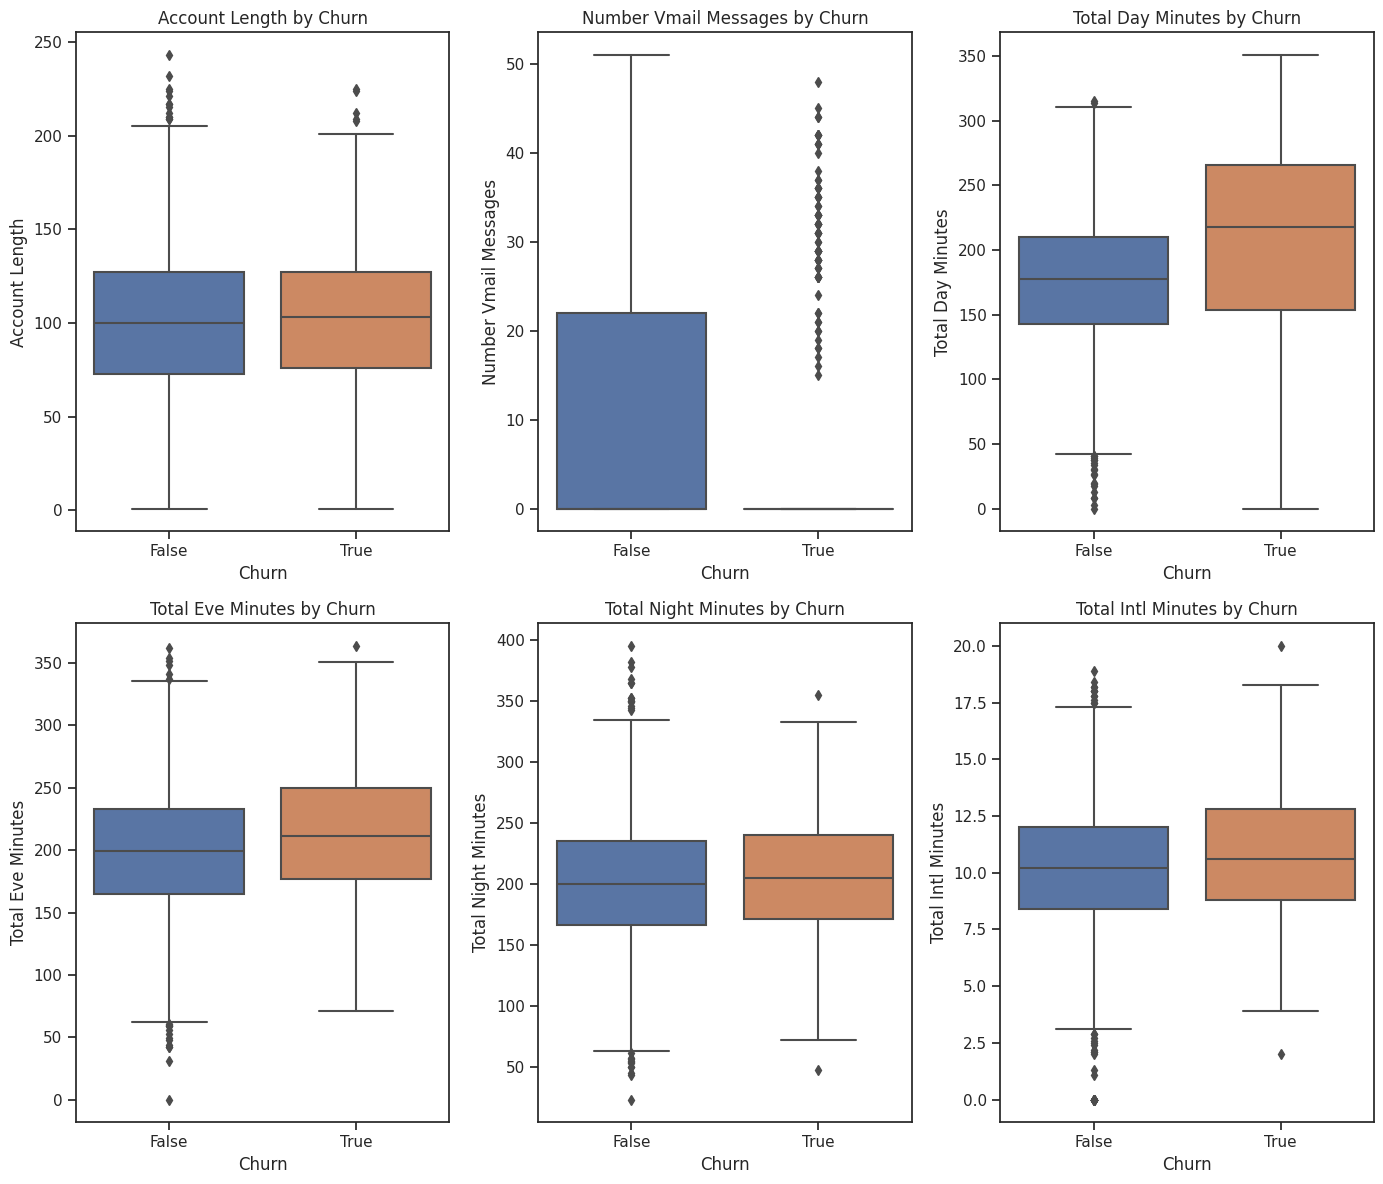

In [7]:
# EDA -- Numeric Features + Correlation Heatmap

# Compare numeric features between churned and non-churned customers

sns.set(style="ticks")  

# List of numeric features
numeric_features = [
    'account_length',
    'number_vmail_messages',
    'total_day_minutes',
    'total_eve_minutes',
    'total_night_minutes',
    'total_intl_minutes'
]

# Creating 3x2 subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 12))
axes = axes.flatten() 

# Plotting each boxplot
for i, feature in enumerate(numeric_features):
    sns.boxplot(x='churn', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f"{feature.replace('_', ' ').title()} by Churn")
    axes[i].set_xlabel("Churn")
    axes[i].set_ylabel(feature.replace('_', ' ').title())


plt.tight_layout()
plt.show()


**EDA summary**

Account Length: There is no significant difference in account length between churned and retained customers, suggesting it’s not a strong churn predictor.

Number of Voicemail Messages: Churned customers have fewer voicemail messages, implying that less engaged users are more likely to leave.

Total Day Minutes: Churners generally spend more time on day calls, making this a potential signal of high-usage dissatisfaction.

Total Evening Minutes: There is a slight increase in evening call usage among churned users, though the distinction is less pronounced than day usage.

Total Night Minutes: No clear visual difference observed, suggesting this feature has low predictive power for churn.

Total International Minutes: Also shows minimal variance across churn groups, indicating a weaker relationship to churn behavior.

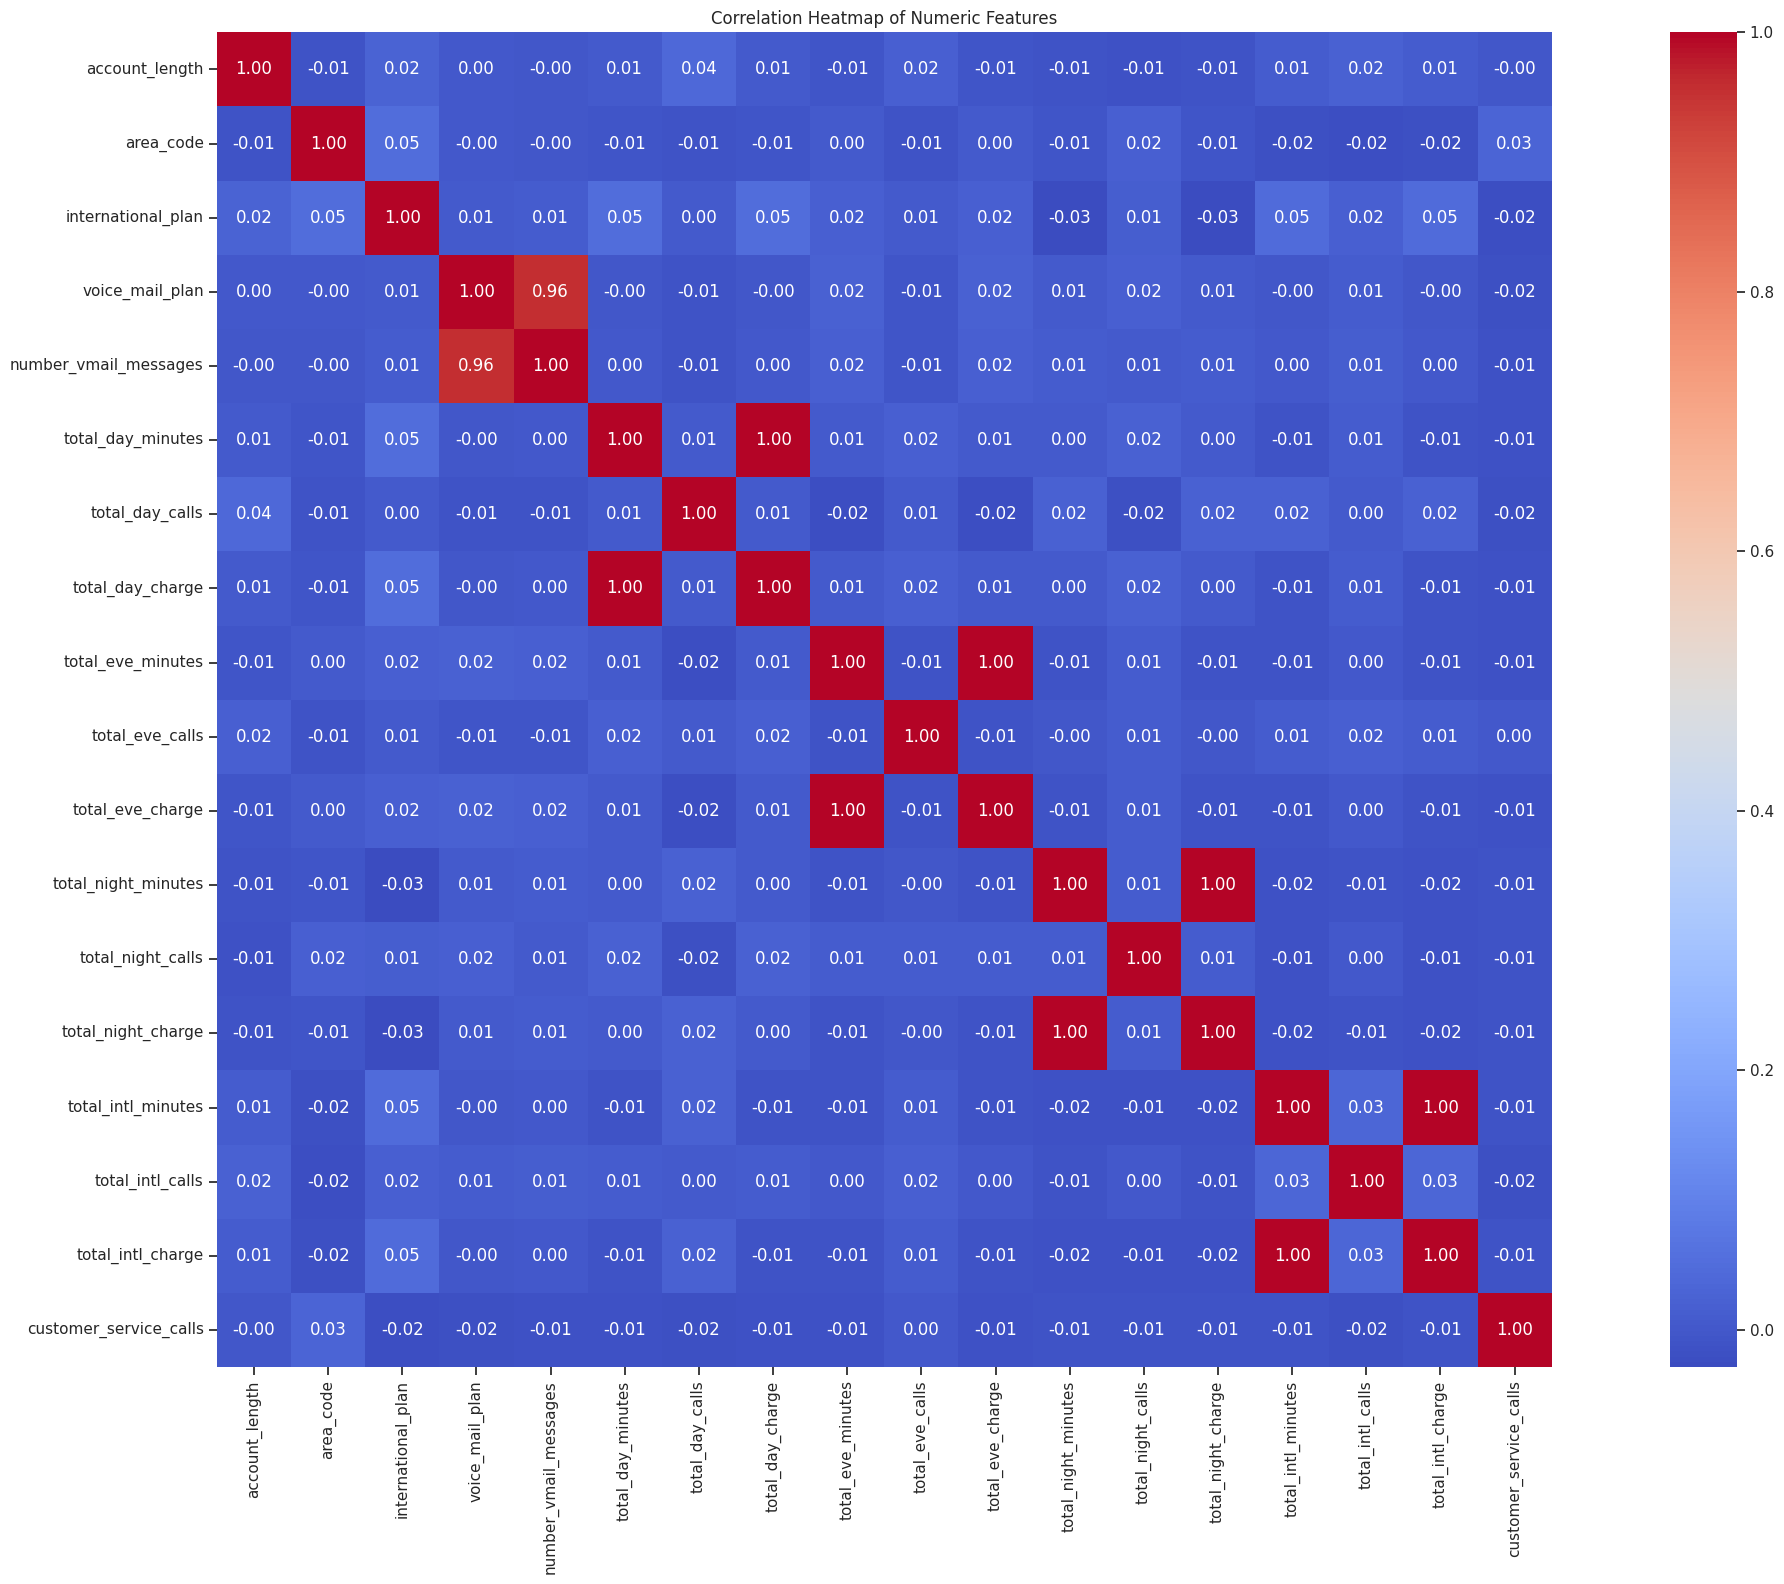

In [8]:
# Correlation Heatmap of Numberic Features
plt.figure(figsize=(24, 16))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


**Heatmap Interpretation**

The heatmap reveals very strong correlations between total call durations and corresponding charge columns — such as:


* total_day_minutes vs total_day_charge → 1.
* total_eve_minutes vs total_eve_charge → 1.
* total_night_minutes vs total_night_charge → 1.
* total_intl_minutes vs total_intl_charge → 1.00
* voice_mail_plan vs number_vmail_messages -> 0.96


**What it means:**

These charge values are calculated directly from minutes, making them redundant.
Including both would lead to multicollinearity, which can:
Skew model coefficients
Cause instability in algorithms like logistic regression
Reduce model generalizability. To fix problem, it would be great drop that columns before creating model

# Building  Models to Identify Churn Risk

In [9]:
# After EDA, we would be able to say some of columns are reductant to building model. So on first step, we will drop columns
columns_to_drop = [
    'total_day_charge',
    'total_eve_charge',
    'total_night_charge',
    'total_intl_charge',
    'voice_mail_plan'
]

df.drop(columns=columns_to_drop, inplace=True)

# Dropping non-numeric columns before model building
df.drop(columns= ['state','area_code'], inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns='churn')
y = df['churn']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Build pipeline with scaling + logistic regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])



# Train the model
logreg_pipeline.fit(X_train, y_train)

# Predict
y_pred = logreg_pipeline.predict(X_test)
y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]



In [12]:
from sklearn.metrics import confusion_matrix

#  Evaluation Function
def evaluate_model(y_true, y_pred, y_proba, title):
    print(f"\n {title}")
    print("-" * 40)
    print(f" Accuracy     : {accuracy_score(y_true, y_pred):.4f}")
    print(f" Precision    : {precision_score(y_true, y_pred):.4f}")
    print(f" Recall       : {recall_score(y_true, y_pred):.4f}")
    print(f" F1 Score     : {f1_score(y_true, y_pred):.4f}")
    print(f" ROC AUC      : {roc_auc_score(y_true, y_proba):.4f}")
    
    #  Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("\n Confusion Matrix:")
    print(f"[[TN: {cm[0][0]}  FP: {cm[0][1]}]")
    print(f" [FN: {cm[1][0]}  TP: {cm[1][1]}]]")


In [13]:
# Evaluating Logistic Regression Model 
evaluate_model(y_test, y_pred, y_proba, "Logistic Regression")


 Logistic Regression
----------------------------------------
 Accuracy     : 0.7826
 Precision    : 0.3805
 Recall       : 0.8125
 F1 Score     : 0.5183
 ROC AUC      : 0.8306

 Confusion Matrix:
[[TN: 444  FP: 127]
 [FN: 18  TP: 78]]



**Logistic Regression model had an accuracy of 78% and a recall of 81%, but it suffered from low precision (38%) and a weak F1 score (0.51), meaning it struggled to correctly identify true churners without a lot of false alarms.**

**By using polynomial features, the model was able to capture nonlinear relationships between variables, leading to higher overall accuracy, better churn detection, and fewer false predictions.**

**This makes the model much more useful for real-world churn prevention strategies.**


# Logisitc Regression + Polynomial Features

In [14]:
#  Importing PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures



#  Polynomial Features + Logistic Regression
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)
y_proba_poly = poly_pipeline.predict_proba(X_test)[:, 1]

In [15]:
# Evaluating Logistic Regression with Polynimial Features
evaluate_model(y_test, y_pred_poly, y_proba_poly, "Polynomial Features + Logistic Regression")




 Polynomial Features + Logistic Regression
----------------------------------------
 Accuracy     : 0.8486
 Precision    : 0.4847
 Recall       : 0.8229
 F1 Score     : 0.6100
 ROC AUC      : 0.9194

 Confusion Matrix:
[[TN: 487  FP: 84]
 [FN: 17  TP: 79]]


# Random Forest

In [37]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np


# Random Forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier( n_estimators=100, class_weight='balanced',random_state=42 ))
])


#  Fitting model
rf_pipeline.fit(X_train, y_train)

#  Predicting probabilities
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Adjusting threshold 
threshold = 0.4
y_pred_adjusted = (y_proba_rf > threshold).astype(int)


In [40]:
# Evaluating Random Forest Model
evaluate_model(y_test, y_pred_adjusted, y_proba_rf, f"Random Forest (Threshold = {threshold})")


📌 Random Forest (Threshold = 0.4)
----------------------------------------
✅ Accuracy     : 0.9505
🎯 Precision    : 0.8810
🔁 Recall       : 0.7629
📏 F1 Score     : 0.8177
🚦 ROC AUC      : 0.9147

🧾 Confusion Matrix:
[[TN: 560  FP: 10]
 [FN: 23  TP: 74]]


# XGBoost Model

In [41]:
# 📦 Imports
from xgboost import XGBClassifier


#  XGBoost Classifier with class_weight equivalent
xgb_model = Pipeline([
    ('scaler', StandardScaler()), 
    ('xgb', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  
        random_state=42
    ))
])

#  Fitting model
xgb_model.fit(X_train, y_train)

#  Predicting probabilities
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Tune threshold to increase recall
threshold = 0.4
y_pred_xgb = (y_proba_xgb > threshold).astype(int)


In [42]:
# Evaluating XGBoost Model
evaluate_model(y_test, y_pred_xgb, y_proba_xgb, f"XGBoost Classifier (Threshold = {threshold})")



📌 XGBoost Classifier (Threshold = 0.4)
----------------------------------------
✅ Accuracy     : 0.9430
🎯 Precision    : 0.7921
🔁 Recall       : 0.8247
📏 F1 Score     : 0.8081
🚦 ROC AUC      : 0.9103

🧾 Confusion Matrix:
[[TN: 549  FP: 21]
 [FN: 17  TP: 80]]


# Model Interperation & Recommendation

After evaluating four different machine learning models for churn prediction — including Logistic Regression, Polynomial Logistic Regression, Random Forest, and XGBoost — it’s clear that each offers a unique trade-off between accuracy, recall, and precision.

1. Logistic Regression, while achieving a high recall of 81.25%, had very low precision (38.05%) and the highest number of false positives (127). This makes it unreliable for real decision-making, although it’s useful as a baseline benchmark.
2. Polynomial Logistic Regression improved the balance, achieving 84.86% accuracy, 82.29% recall, and 48.47% precision. It showed that modeling feature interactions increases predictive power, especially when interpretability is still important.
3. Random Forest (Threshold = 0.4) stood out in terms of precision (88.10%) and accuracy (95.05%) with only 10 false positives, but slightly lower recall (76.29%) than other top models. It's ideal for businesses focused on avoiding unnecessary interventions.
4. XGBoost (Threshold = 0.4) provided the best overall performance with 94.30% accuracy, 82.47% recall, and 79.21% precision, correctly identifying 80 churners — more than any other model. Its high F1 Score (0.8081) and ROC AUC (0.9103) show that it delivers on both impact and reliability.



# **FINAL RECOMMENDATION For model selection**
In churn prediction, the cost of missing a real churner is often greater than mistakenly flagging a loyal customer. Therefore, recall must be prioritized, as it directly supports retention efforts.Use XGBoost with a lowered threshold (0.4) as your primary churn prediction model. It strikes the ideal balance between catching most at-risk customers while maintaining business efficiency — making it a strong candidate for both deployment and portfolio presentation.


# Feature Importance 

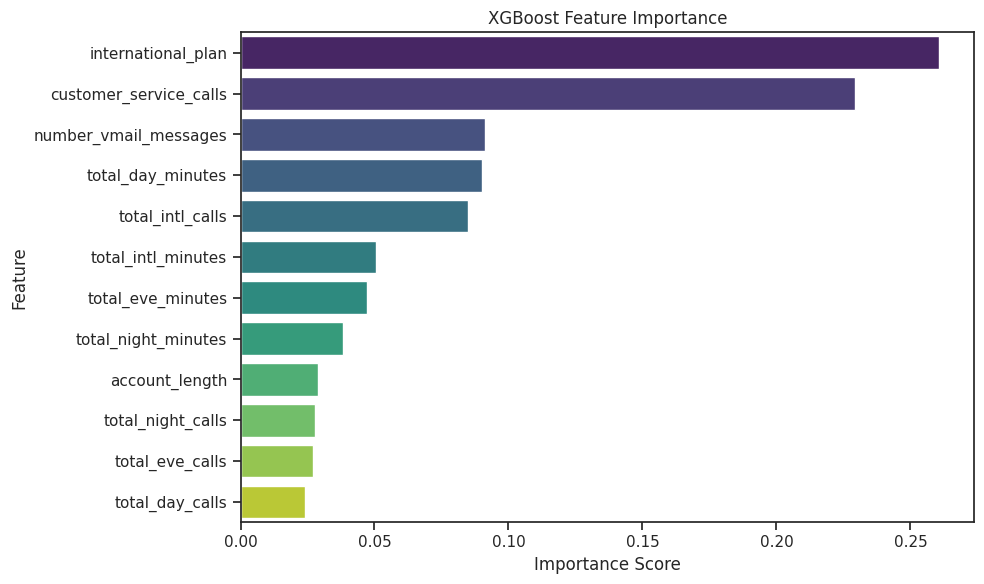

In [58]:
# Extracting trained model from pipeline
xgb_clf = xgb_model.named_steps['xgb']  # Use your pipeline name here

# Getting feature importances and names
importances = xgb_clf.feature_importances_
feature_names = X.columns

# Create DataFrame
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Strategic Insight 

International Plan (Most Important): Customers with international calling plans show the highest risk of churn, likely due to dissatisfaction with pricing or service value.

Customer Service Calls: A high volume of support calls strongly indicates frustration or unresolved issues, making these customers more likely to leave.

Voicemail Usage:Low engagement with voicemail features may signal overall disconnection from services and a higher chance of silent churn.

# Recommendations
# 1. Implement targeted retention campaigns for customers with international plans, as they represent the highest likelihood of churn.
# 2. Establish a proactive support follow-up process for customers with frequent service interactions to address unresolved issues early.
# 3. Design engagement-driven interventions (such as feature education or personalized outreach) for users with low voicemail usage or overall service activity.
   
# By focusing on these key drivers, the organization can improve retention efficiency, reduce operational churn cost, and enhance overall customer satisfaction.